<a href="https://colab.research.google.com/github/worklifesg/Python-for-Computer-Vision-with-OpenCV-and-Deep-Learning/blob/main/3.%20Image%20Processing/5_ImageProcessing_MorphologicalOperators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Morphological Operators

Sets of kernels that can achieve a variety of effects, such as reducing noise.
- There are certain operators that are very good at reducing black points on a white background.
- Other operators can achieve erosion and dilation effect that can add/erode from existing image. 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# LOAD IMG FUNCTION

def load_img():
  blank_img = np.zeros((600,600))
  font = cv2.FONT_HERSHEY_SIMPLEX
  cv2.putText(blank_img,text='ABCDE',org=(50,300),
              fontFace=font,fontScale=5,color=(255,255,255),
              thickness=30)
  return blank_img

#DISPLAY IMAGE:
def display_img(img):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

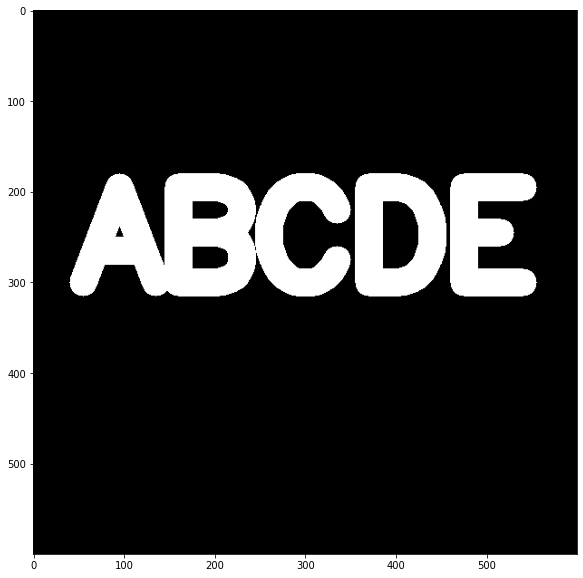

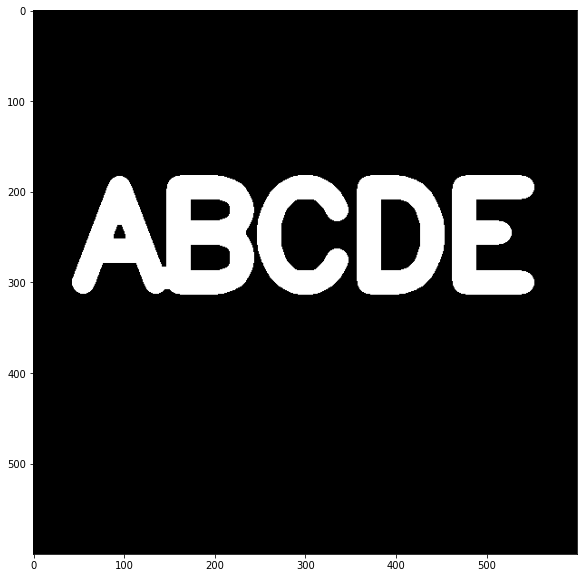

In [3]:
img = load_img()
display_img(img)

#erode the boundary

kernel = np.ones((5,5),dtype=np.uint8)

result = cv2.erode(img,kernel,iterations=1)
display_img(result)

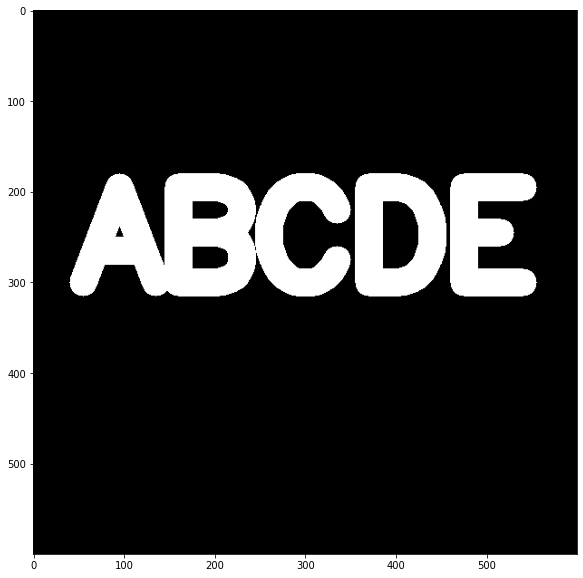

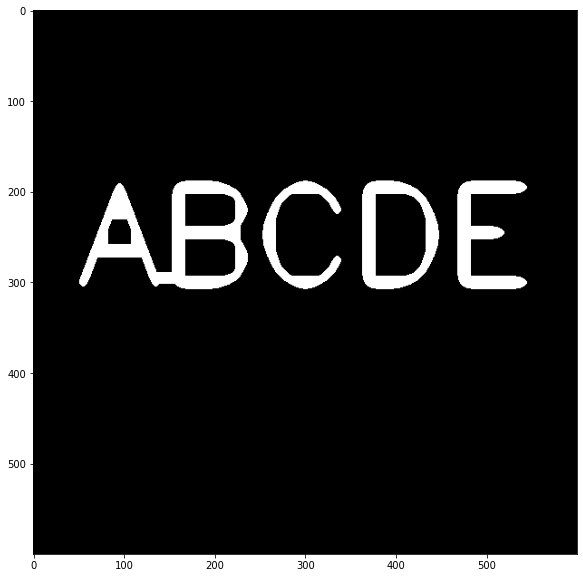

In [4]:
img = load_img()
display_img(img)

kernel = np.ones((5,5),dtype=np.uint8)

result = cv2.erode(img,kernel,iterations=4)
display_img(result)

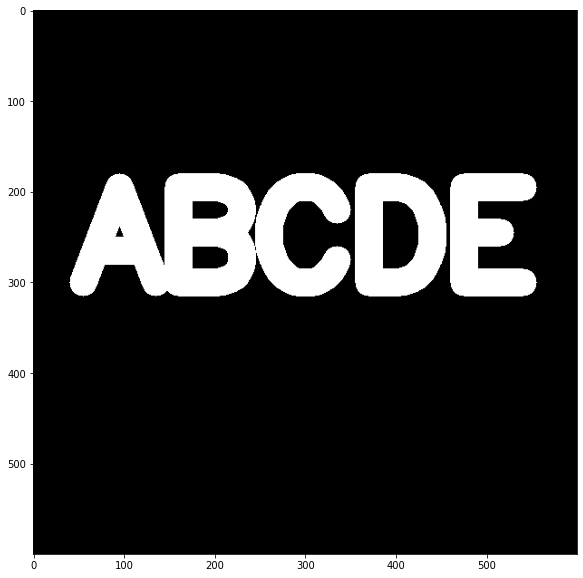

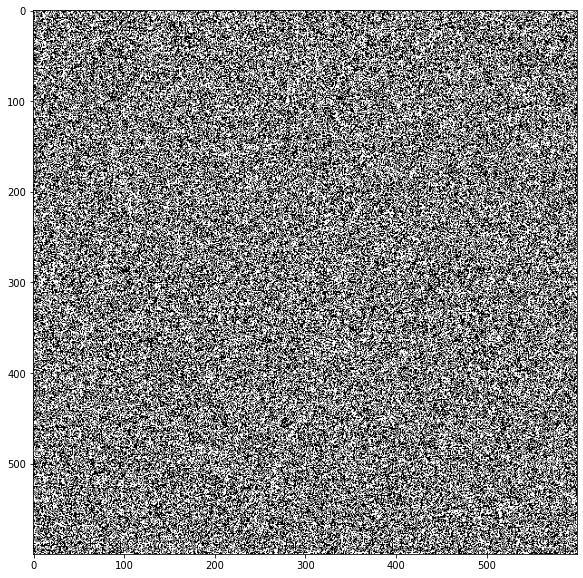

In [5]:
#opening = erosion + dilation = helpful in removing background noise

img = load_img()
display_img(img)

white_noise = np.random.randint(low=0,high=2,size=(600,600)) #array of 0,1 600x600
display_img(white_noise)

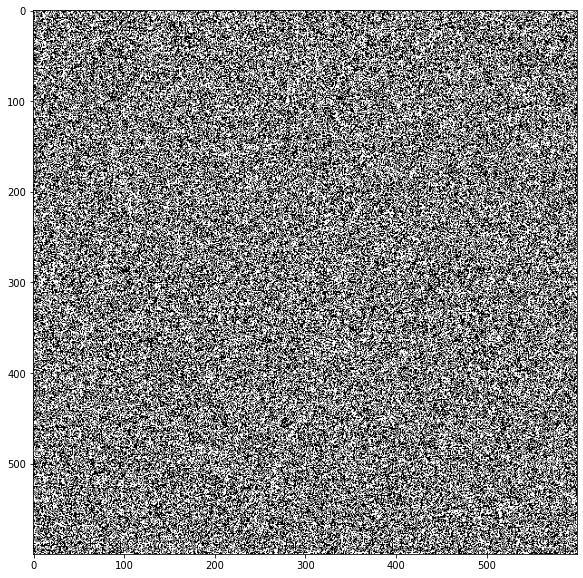

In [6]:
#max value of iamge is 255 so we need to convert those to 0,1 to 255

white_noise = white_noise*255
display_img(white_noise)

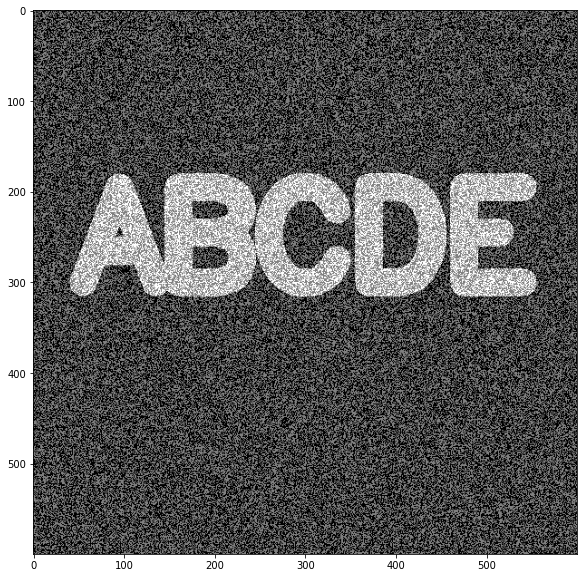

In [7]:
noise_img = white_noise+img

display_img(noise_img)

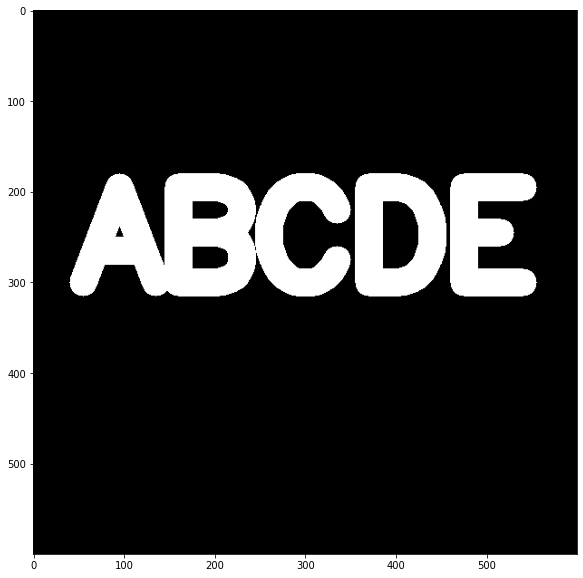

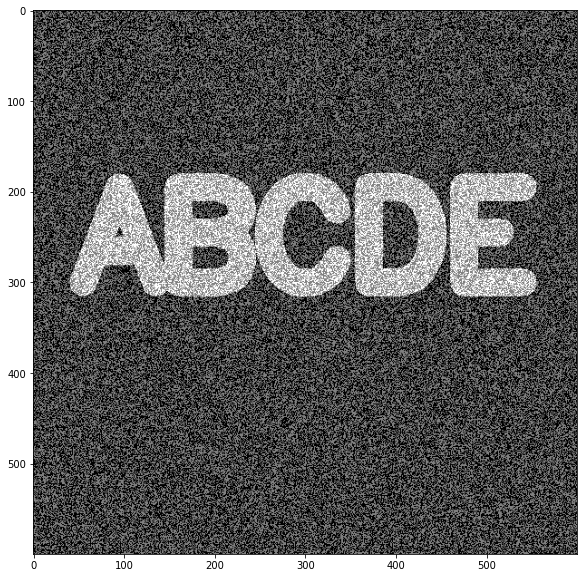

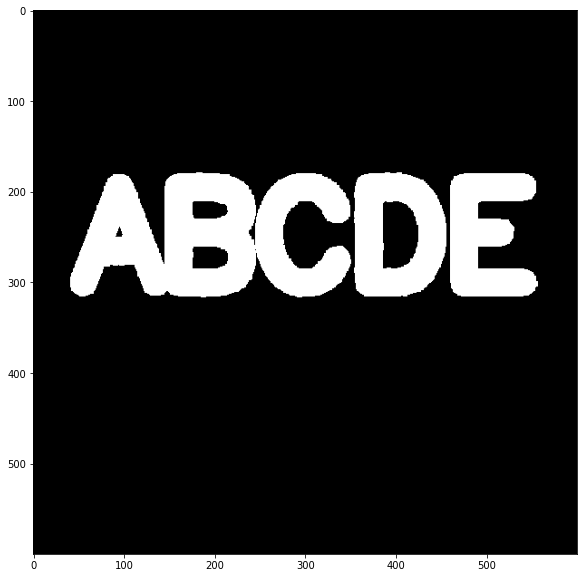

In [8]:
opening = cv2.morphologyEx(noise_img,cv2.MORPH_OPEN,kernel)
display_img(img)
display_img(noise_img)
display_img(opening)

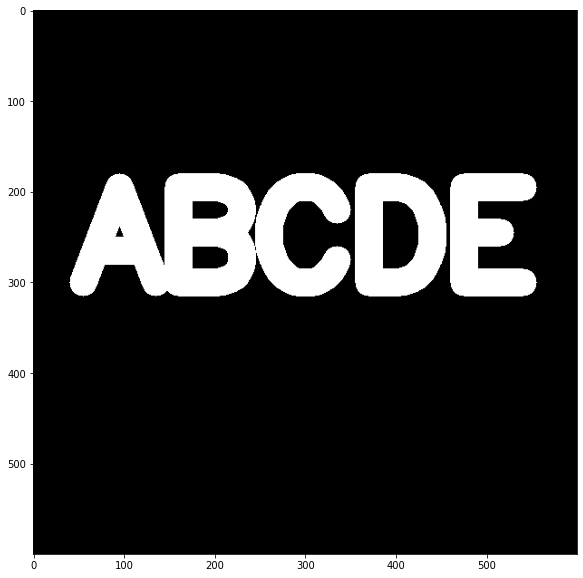

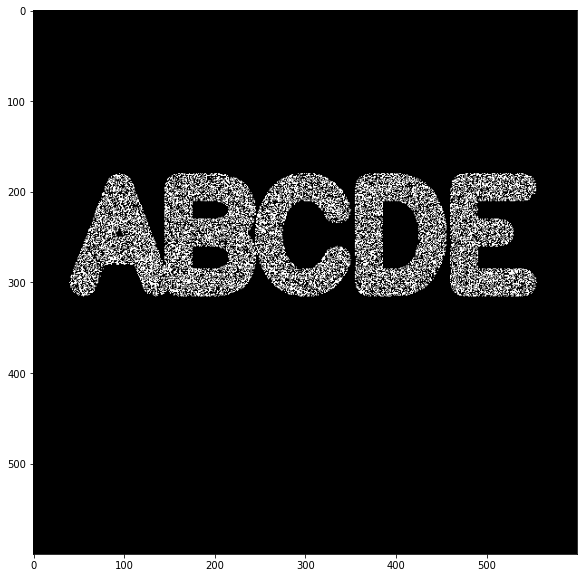

In [9]:
#FOREGROUND NOISE

img = load_img()

black_noise = np.random.randint(low=0,high=2,size=(600,600))*255

black_noise_img = img + black_noise

black_noise_img[black_noise_img==255]=0 #to have min value 0

closing = cv2.morphologyEx(black_noise_img,cv2.MORPH_CLOSE,kernel)

display_img(img)
display_img(black_noise_img)
display_img(closing)

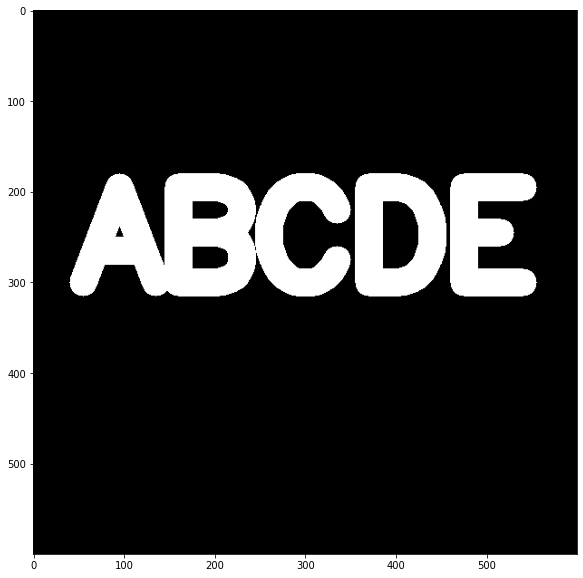

In [10]:
#Gradient = difference between dilation and erosion - method of edge detection

img = load_img()

gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)

display_img(img)
display_img(gradient)
